# BayWheels Bike Trip 
## by William

## Investigation Overview

This dataset is about baywheels bike rented records. Some exploration that will be conducted are customer rental time behavior across variables like rental access and customer type.

## Dataset Overview

Baywheels trip data is about the trip data for every rented bike in Baywheels at March 2020. The data has 176799 rows and 14 columns. 

Duplicate data is not found among the data.

Some columns has missing data, like start station, end station id and name, and rental access method.

Missing data will not be a problem especially station id and name because they are represented by station coordinate. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('202003-baywheels-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Rental Time Distribution

Histogram rental time distribution

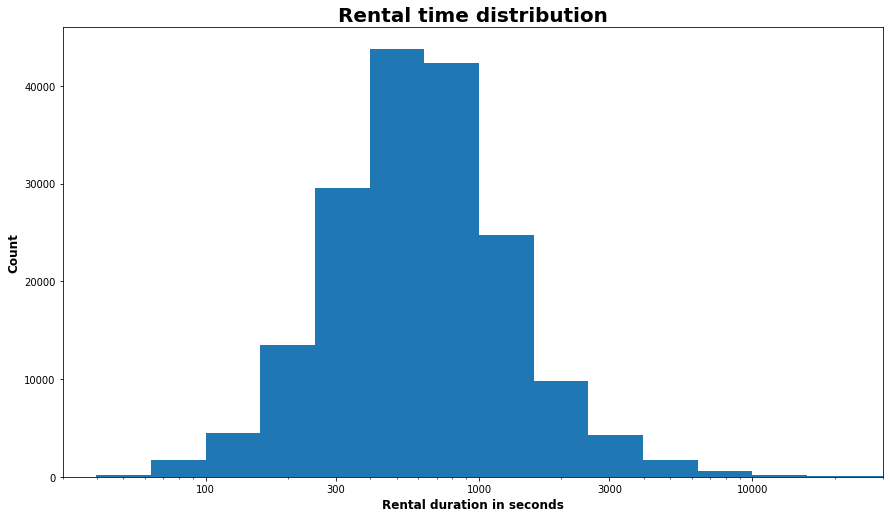

In [3]:
#Building log transformed histogram on duration rented (seconds)
plt.figure(figsize=[14.70, 8.27])
bins = 10**np.arange(0, np.log10(df.duration_sec.max()+0.2), 0.2) 
plt.hist(df.duration_sec, bins=bins);
plt.xscale('log')
ticks = [100,300,1000,3000,10000, 300000]
plt.xticks(ticks, ticks)
plt.xlim(30, 30000)
plt.xlabel('Rental duration in seconds', fontsize = 12, weight = "bold")
plt.ylabel('Count',fontsize = 12, weight = "bold")
plt.title('Rental time distribution', fontsize = 20, weight = "bold");

The renting duration is unimodal and normal distributed with its peak around 861 seconds or 12.3 minutes.

In [4]:
#dropping data with duration > 3000 sec because they are considered outlier
ind=df[df.duration_sec > 3000].index
df2=df.copy()
df2.drop(ind, axis=0, inplace=True)

## Duration Spent and User type Plot 


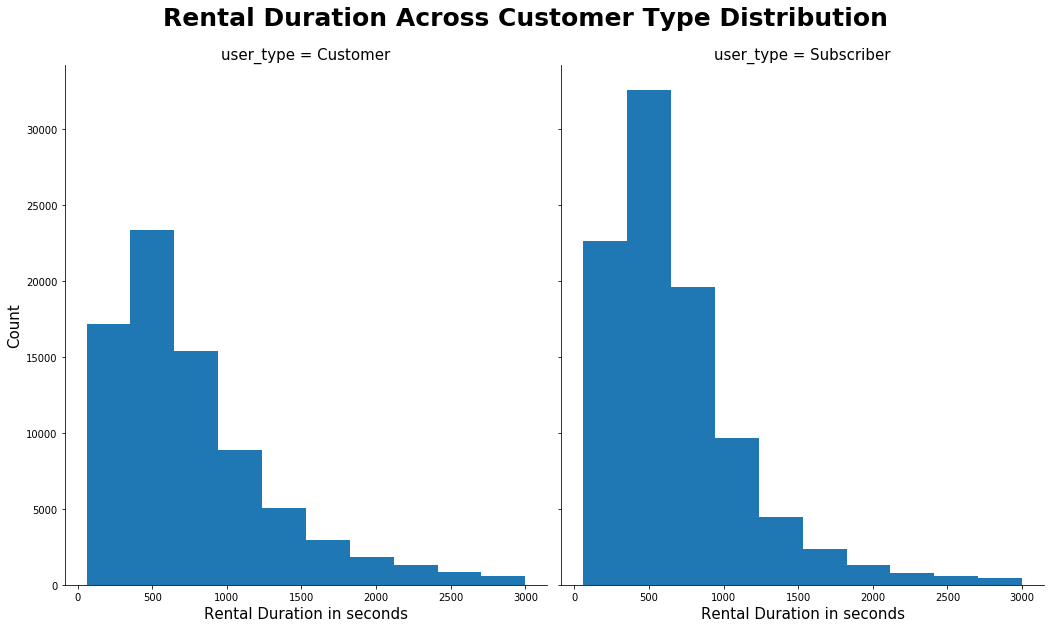

In [11]:
# Plotting duration distribution with user type
#2x1
plt.rcParams["axes.labelsize"] = 15
g = sb.FacetGrid(data = df2, col = 'user_type', height = 8.27/1,  aspect = (14.70/2)/(8.27/1))
g.map(plt.hist, "duration_sec")
plt.suptitle("Rental Duration Across Customer Type Distribution", y = 1.05,fontsize = 25, weight = "bold")
g.set_axis_labels(x_var="Rental Duration in seconds", y_var="Count")
plt.tight_layout();

From the plots above, there is little difference in duration rented between Baywheels subscriber and customer.
They both share the same distribution and have the same mode, around 500 seconds or 8.3 minutes. 
The same observation here is the two customer rented time is right skewed. Eight minutes usually used to play with the bike with leisure, walking aroung the park or other short time activities.

## Rental Method and User Type Plot
Clustered bar plot rental method and user type 

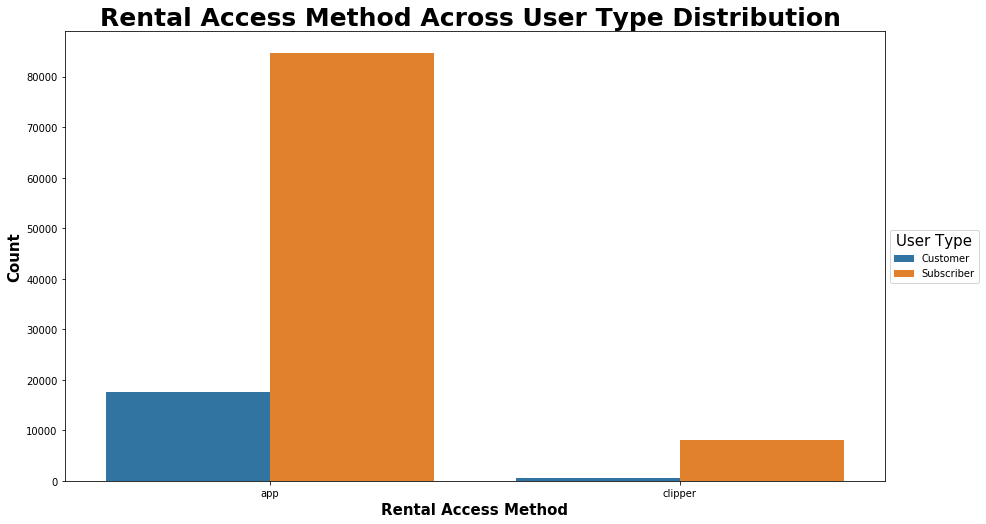

In [48]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=df2, x='rental_access_method', hue='user_type')
plt.title('Rental Access Method Across User Type Distribution ', fontsize = 25, weight = "bold")
plt.xlabel('Rental Access Method'.title(), fontsize = 15, weight = "bold")
plt.ylabel('Count'.title(), fontsize = 15, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="User Type", title_fontsize = 15);

Baywheels customer prefer using mobile application rather than using card clipper and the numebr of subscriber is suprisingly high in mobile app and clipper. Only a few amount that use Baywheel service is a casual customer. 

## Rental Access, User type, and Duration Plot 

Plot will be constructed using clustered bar plot.


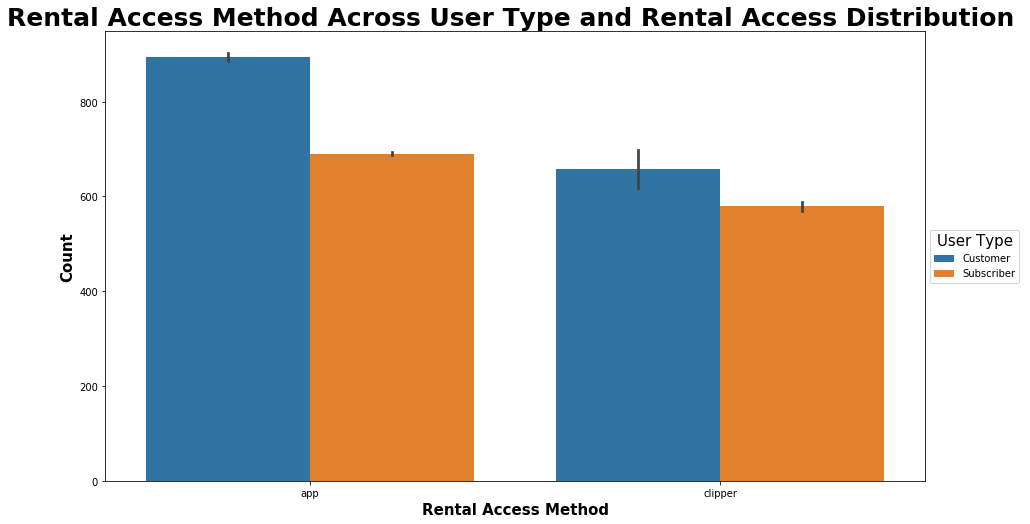

In [50]:
#COnstruction clustered bar plot between rental access, duration, and user type
plt.figure(figsize=[14.70, 8.27])
sb.barplot(data=df2, x='rental_access_method', y='duration_sec', hue='user_type')
plt.title('Rental Access Method Across User Type and Rental Access Distribution ', fontsize = 25, weight = "bold")
plt.xlabel('Rental Access Method'.title(), fontsize = 15, weight = "bold")
plt.ylabel('Count'.title(), fontsize = 15, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="User Type", title_fontsize = 15);


Even though, Baywheels customers consist of subscriber, casual customer spent more time renting the bike than subscriber in both rental access (app, clipper).

The average time spent from casual customer that used app is over 800. This is higher than the average of subscriber customer that used the app. There difference is about 200 seconds or 3.33 minutes. But, on average, customer who used clipper do not differ significantly.


## Key Insight : 

On average, the time Baywheel customer spent on renting the bike is not significantly different across user type and rental access method.

Rental access using mobile app is preferred than using the traditional clipper card.

Casual customer spent more time renting the bike than subscriber. Maybe this is because they are first time user that got excited. Subscriber users have lower rental time than casual.

Average renting bike for every customers is around 12 minutes. Baywheels could manage their delivery performance by assesing the waiting time for each customer. 